In [1]:
# import json
import json

In [2]:
# reference: python read JSON file: https://www.programiz.com/python-programming/json
# read JSON file using the open function.
with open('paper.json') as f:
    all_data = json.load(f)

In [3]:
# suppose the data is in all_data. separate data into alzheimer's data(alz_data) and cancer's data(cancer_data) based on content in the Query.
alz_data = {PubmedId: data for PubmedId, data in all_data.items()
            if data["Query"] == "Alzheimers" or data["Query"] == ['Alzheimers','cancer']}
cancer_data = {PubmedId: data for PubmedId, data in all_data.items()
            if data["Query"] == "cancer" or data["Query"] == ['Alzheimers','cancer']}

In [4]:
# use variable alz_count_noMesh to save the number of Alzheimer's papers that have no MeSH terms.
alz_count_noMesh = 0
# reference: https://www.delftstack.com/howto/python/number-of-keys-in-dictionary-python/
# use for loop to count number of keys that have no MeSH terms in the dictionary alz_data.
for key in alz_data.keys():
    if len(alz_data[key]["Mesh"]) == 0:
        alz_count_noMesh = alz_count_noMesh + 1
# calculate the fraction.
alz_total_count = len(alz_data.keys())
alz_fraction = alz_count_noMesh/alz_total_count
# reference: https://www.kite.com/python/answers/how-to-format-a-number-as-a-percentage-in-python
alz_fraction_percentage = "{:.0%}".format(alz_fraction)
print (f"The number of Alzheimer's papers that have no MeSH terms is {alz_count_noMesh}, which is {alz_fraction_percentage} of total Alzheimer's papers.")

# use variable cancer_count_noMesh to save the number of cancer papers that have no MeSH terms.
cancer_count_noMesh = 0
# use for loop to count number of keys that have no MeSH terms in the dictionary cancer_data.
for key in cancer_data.keys():
    if len(cancer_data[key]["Mesh"]) == 0:
        cancer_count_noMesh = cancer_count_noMesh + 1
# calculate the fraction.
cancer_total_count = len(cancer_data.keys())
cancer_fraction = cancer_count_noMesh/cancer_total_count
# reference: https://www.kite.com/python/answers/how-to-format-a-number-as-a-percentage-in-python
cancer_fraction_percentage = "{:.0%}".format(cancer_fraction)
print (f"The number of cancer papers that have no MeSH terms is {cancer_count_noMesh}, which is {cancer_fraction_percentage} of total cancer papers.")

The number of Alzheimer's papers that have no MeSH terms is 163, which is 16% of total Alzheimer's papers.
The number of cancer papers that have no MeSH terms is 758, which is 76% of total cancer papers.


In [5]:
# reference: https://www.delftstack.com/howto/python/python-counter-most-common/
# import module Counter.
from collections import Counter
# function most_common_Mesh() was defined to find the 10 most common MeSH terms of a specific disease when a list is entered.
def most_common_Mesh(List,disease):
    # a Counter is a collection where elements are stored as dictionary keys, and the key’s counts are stored as dictionary values.
    Mesh_count = Counter(List)
    # use the most_common() of Counter to find the most common elements of a list in python, save into the tuple top_10_Mesh.
    top_10_Mesh = Mesh_count.most_common(10)
    # reference: https://stackoverflow.com/questions/7558908/unpacking-a-list-tuple-of-pairs-into-two-lists-tuples
    # separate tuple top_10_Mesh into two lists top_10_Mesh_term, top_10_Mesh_frequency.
    top_10_Mesh_term, top_10_Mesh_frequency = list(zip(*top_10_Mesh))
    print(f"The 10 most common MeSH terms for the {disease} papers are: ")
    print(*top_10_Mesh_term, sep = '; ')
    return top_10_Mesh

In [6]:
# generate list alz_Mesh, to save all the MeSH terms of Alzheimer's.
alz_Mesh = []
for key in alz_data.keys():
    # select only the MeSH terms that are not empty.
    if len(alz_data[key]["Mesh"]) != 0:
        # merge two lists.
        # reference: https://www.w3schools.com/python/gloss_python_join_lists.asp
        alz_Mesh.extend(alz_data[key]["Mesh"])
# run function most_common_Mesh() on list alz_Mesh.
alz_top_10_Mesh = most_common_Mesh(alz_Mesh, 'Alzheimers')

The 10 most common MeSH terms for the Alzheimers papers are: 
Humans; Alzheimer Disease; Male; Female; Aged; Animals; Amyloid beta-Peptides; Brain; Aged, 80 and over; Cognitive Dysfunction


In [7]:
# generate list cancer_Mesh, same as above.
cancer_Mesh = []
for key in cancer_data.keys():
    if len(cancer_data[key]["Mesh"]) != 0:
        # merge two lists.
        # reference: https://www.w3schools.com/python/gloss_python_join_lists.asp
        cancer_Mesh.extend(cancer_data[key]["Mesh"])
cancer_top_10_Mesh = most_common_Mesh(cancer_Mesh, 'cancer')

The 10 most common MeSH terms for the cancer papers are: 
Humans; Female; Male; Middle Aged; Aged; Adult; Animals; Neoplasms; Retrospective Studies; Aged, 80 and over


In [8]:
# import libraries matplotlib and pandas.
import matplotlib.pyplot as plt
import pandas as pd

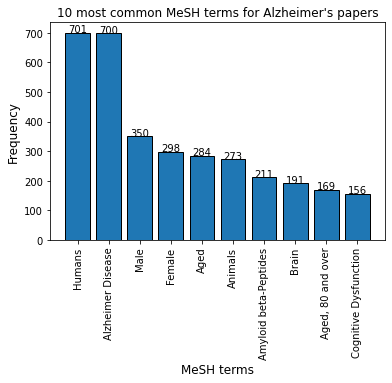

In [9]:
# create pandas dataframe to save the results of top 10 MeSH terms of Alzheimer's.
# Then draw the bar chart.
df = pd.DataFrame(alz_top_10_Mesh, columns = ['MeSH','Frequency'])
plt.bar(df.MeSH, height = df.Frequency, edgecolor = "black")
plt.xlabel("MeSH terms",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize = 10)
plt.title("10 most common MeSH terms for Alzheimer's papers", fontsize = 12)
for x,y in enumerate(df.Frequency):
    plt.text(x, y+1, '%.0f'%y, ha = 'center')
plt.show()

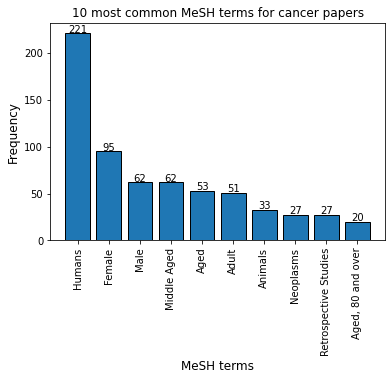

In [10]:
# same as above.
df = pd.DataFrame(cancer_top_10_Mesh, columns = ['MeSH','Frequency'])
plt.bar(df.MeSH, height = df.Frequency, edgecolor = "black")
plt.xlabel("MeSH terms",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize = 10)
plt.title("10 most common MeSH terms for cancer papers", fontsize = 12)
for x,y in enumerate(df.Frequency):
    plt.text(x, y+1, '%.0f'%y, ha = 'center')
plt.show()

In [11]:
# find the top 5 MeSH terms from Alzheimer's query, save into the list alz_top_5_Mesh.
# same as cancer, save into the list cancer_top_5_Mesh.
alz_top_5_Mesh = Counter(alz_Mesh).most_common(5)
alz_top_5_Mesh = list(zip(*alz_top_5_Mesh))
alz_top_5_Mesh = list(alz_top_5_Mesh[0])
cancer_top_5_Mesh = Counter(cancer_Mesh).most_common(5)
cancer_top_5_Mesh = list(zip(*cancer_top_5_Mesh))
cancer_top_5_Mesh = list(cancer_top_5_Mesh[0])
# find the MeSH terms that both present in top 5 MeSH terms of Alzheimer's or cancers, save into the set same_Mesh.
same_Mesh = set(alz_top_5_Mesh)&set(cancer_top_5_Mesh)

In [12]:
# function count_paper_top_5_Mesh() was defined, to return the counts of papers that have two of top 5 MeSH terms.
def count_paper_top_5_Mesh():
    count_result = []
    # use nested for loop to traverse all the top 5 MeSH terms of Alzheimer's and cancer.
    for elm1 in alz_top_5_Mesh:
        for elm2 in cancer_top_5_Mesh:
            # use variable count to record the counting numbers.
            count = 0
            for key in all_data.keys():
                # if the MeSH terms of one paper have two of top 5 MeSH terms, count increases by one.
                if elm1 in all_data[key]["Mesh"] and elm2 in all_data[key]["Mesh"]:
                    count = count + 1
            count_result_elm = (elm1,elm2,count)
            # result save into tuple count_result.
            count_result.append(count_result_elm)
    return count_result
                
count_result = count_paper_top_5_Mesh()

In [13]:
table_content = []
# extract only the counts, save into the list table_content.
for i in range(len(count_result)):
    table_content.append(count_result[i][2])
# reference: https://stackoverflow.com/questions/9671224/split-a-python-list-into-other-sublists-i-e-smaller-lists
# split list table_content into sublists in group of five.
table_content = [table_content[data:data + 5] for data in range(0, len(table_content),5)]
table_content

[[923, 381, 369, 208, 338],
 [585, 236, 281, 109, 227],
 [369, 327, 413, 180, 288],
 [381, 394, 327, 192, 295],
 [338, 295, 288, 175, 338]]

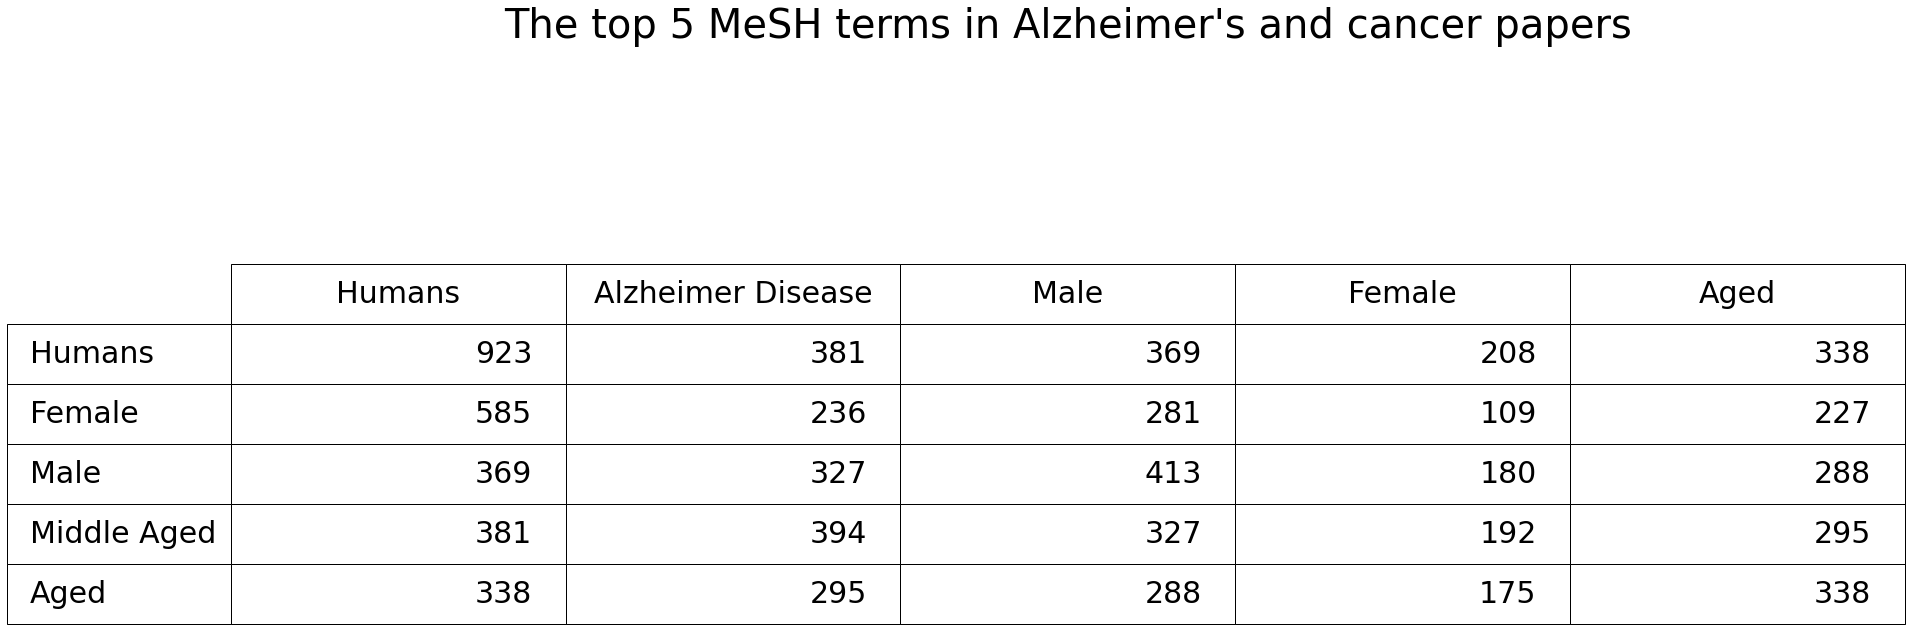

In [14]:
# reference: https://stackoverflow.com/questions/15514005/how-to-change-the-tables-fontsize-with-matplotlib-pyplot
# reference: https://www.delftstack.com/howto/matplotlib/plot-table-using-matplotlib/
# plot table using matplotlib.
fig, sub_axes = plt.subplots(1,1)
# create dataframe, in which the column name is top 5 MeSH terms of Alzheimer's. Data inside are the count of papers having both the matching MeSH terms.
df_table = pd.DataFrame(table_content, columns = alz_top_5_Mesh)
sub_axes.axis('off')
sub_axes.set_title("The top 5 MeSH terms in Alzheimer's and cancer papers", fontsize = 40)
table = sub_axes.table(cellText = df_table.values, colLabels = df_table.columns, rowLabels = cancer_top_5_Mesh, fontsize = 15)
table.set_fontsize(30)
table.scale(5,5)